In [150]:
import pandas as pd 
import numpy as np
import seaborn as sn 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, plot_importance
from sklearn.preprocessing import LabelEncoder


In [149]:

smple_data = pd.read_csv('sample_submission.csv')#actual data file
smple_data.value_counts()

id      y  
999983  0.5    1
999982  0.5    1
999981  0.5    1
999980  0.5    1
999979  0.5    1
              ..
750004  0.5    1
750003  0.5    1
750002  0.5    1
750001  0.5    1
750000  0.5    1
Name: count, Length: 250000, dtype: int64

In [115]:
train = pd.read_csv("train.csv")

In [116]:
train

id  age          job   marital  education default  balance  \
0            0   42   technician   married  secondary      no        7   
1            1   38  blue-collar   married  secondary      no      514   
2            2   36  blue-collar   married  secondary      no      602   
3            3   27      student    single  secondary      no       34   
4            4   26   technician   married  secondary      no      889   
...        ...  ...          ...       ...        ...     ...      ...   
749995  749995   29     services    single  secondary      no     1282   
749996  749996   69      retired  divorced   tertiary      no      631   
749997  749997   50  blue-collar   married  secondary      no      217   
749998  749998   32   technician   married  secondary      no     -274   
749999  749999   42   technician   married  secondary      no     1559   

       housing loan   contact  day month  duration  campaign  pdays  previous  \
0           no   no  cellular   25   aug       117         3     -1         0   
1           no   no   unknown   18   jun       185         1     -1         0   
2          yes   no   unknown   14   may       111         2     -1         0   
3          yes   no   unknown   28   may        10         2     -1         0   
4          yes   no  cellular    3   feb       902         1     -1         0   
...        ...  ...       ...  ...   ...       ...       ...    ...       ...   
749995      no  yes   unknown    4   jul      1006         2     -1         0   
749996      no   no  cellular   19   aug        87         1     -1         0   
749997     yes   no  cellular   17   apr       113         1     -1         0   
749998      no   no  cellular   26   aug       108         6     -1         0   
749999      no   no  cellular    4   aug       143         1      1         7   

       poutcome  y  
0       unknown  0  
1       unknown  0  
2       unknown  0  
3       unknown  0  
4       unknown  1  
...         ... ..  
749995  unknown  1  
749996  unknown  0  
749997  unknown  0  
749998  unknown  0  
749999  failure  0  

[750000 rows x 18 columns]

In [117]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         750000 non-null  int64 
 1   age        750000 non-null  int64 
 2   job        750000 non-null  object
 3   marital    750000 non-null  object
 4   education  750000 non-null  object
 5   default    750000 non-null  object
 6   balance    750000 non-null  int64 
 7   housing    750000 non-null  object
 8   loan       750000 non-null  object
 9   contact    750000 non-null  object
 10  day        750000 non-null  int64 
 11  month      750000 non-null  object
 12  duration   750000 non-null  int64 
 13  campaign   750000 non-null  int64 
 14  pdays      750000 non-null  int64 
 15  previous   750000 non-null  int64 
 16  poutcome   750000 non-null  object
 17  y          750000 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 103.0+ MB


In [ ]:

col = train.select_dtypes(include='object')
num = train.select_dtypes(exclude='object')
le = LabelEncoder()
col.info()

for i in col.columns:
    col[i]= le.fit_transform(col[i])
    

col

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   job        750000 non-null  object
 1   marital    750000 non-null  object
 2   education  750000 non-null  object
 3   default    750000 non-null  object
 4   housing    750000 non-null  object
 5   loan       750000 non-null  object
 6   contact    750000 non-null  object
 7   month      750000 non-null  object
 8   poutcome   750000 non-null  object
dtypes: object(9)
memory usage: 51.5+ MB


job  marital  education  default  housing  loan  contact  month  \
0         9        1          1        0        0     0        0      1   
1         1        1          1        0        0     0        2      6   
2         1        1          1        0        1     0        2      8   
3         8        2          1        0        1     0        2      8   
4         9        1          1        0        1     0        0      3   
...     ...      ...        ...      ...      ...   ...      ...    ...   
749995    7        2          1        0        0     1        2      5   
749996    5        0          2        0        0     0        0      1   
749997    1        1          1        0        1     0        0      0   
749998    9        1          1        0        0     0        0      1   
749999    9        1          1        0        0     0        0      1   

        poutcome  
0              3  
1              3  
2              3  
3              3  
4              3  
...          ...  
749995         3  
749996         3  
749997         3  
749998         3  
749999         0  

[750000 rows x 9 columns]

In [119]:
colname = col.columns


In [120]:
train[colname] = col

In [121]:
train

id  age  job  marital  education  default  balance  housing  loan  \
0            0   42    9        1          1        0        7        0     0   
1            1   38    1        1          1        0      514        0     0   
2            2   36    1        1          1        0      602        1     0   
3            3   27    8        2          1        0       34        1     0   
4            4   26    9        1          1        0      889        1     0   
...        ...  ...  ...      ...        ...      ...      ...      ...   ...   
749995  749995   29    7        2          1        0     1282        0     1   
749996  749996   69    5        0          2        0      631        0     0   
749997  749997   50    1        1          1        0      217        1     0   
749998  749998   32    9        1          1        0     -274        0     0   
749999  749999   42    9        1          1        0     1559        0     0   

        contact  day  month  duration  campaign  pdays  previous  poutcome  y  
0             0   25      1       117         3     -1         0         3  0  
1             2   18      6       185         1     -1         0         3  0  
2             2   14      8       111         2     -1         0         3  0  
3             2   28      8        10         2     -1         0         3  0  
4             0    3      3       902         1     -1         0         3  1  
...         ...  ...    ...       ...       ...    ...       ...       ... ..  
749995        2    4      5      1006         2     -1         0         3  1  
749996        0   19      1        87         1     -1         0         3  0  
749997        0   17      0       113         1     -1         0         3  0  
749998        0   26      1       108         6     -1         0         3  0  
749999        0    4      1       143         1      1         7         0  0  

[750000 rows x 18 columns]

In [122]:
def valueFind(train) :
    lst = {}
    for name in train.columns:
        if train[name].dtype == "int64":
            k = train[name].unique() 
            if (len(k) <100):
                lst[name] = train[name].unique() 
            else:
                lst[name] = "many" 
            
        
    return lst         

In [123]:
k = valueFind(train)
k


{'id': 'many',
 'age': array([42, 38, 36, 27, 26, 24, 39, 50, 46, 32, 37, 57, 33, 47, 35, 49, 77,
        40, 54, 56, 51, 30, 67, 58, 59, 45, 43, 29, 48, 31, 28, 34, 60, 52,
        41, 81, 23, 62, 53, 72, 55, 25, 44, 61, 63, 69, 75, 71, 64, 22, 83,
        70, 80, 21, 65, 74, 68, 19, 73, 66, 79, 20, 84, 86, 76, 18, 82, 78,
        87, 85, 88, 94, 93, 89, 92, 95, 90, 91]),
 'job': array([ 9,  1,  8,  0,  4,  2,  6, 11,  7,  5,  3, 10]),
 'marital': array([1, 2, 0]),
 'education': array([1, 0, 2, 3]),
 'default': array([0, 1]),
 'balance': 'many',
 'housing': array([0, 1]),
 'loan': array([0, 1]),
 'contact': array([0, 2, 1]),
 'day': array([25, 18, 14, 28,  3, 20, 21, 31,  4,  8,  5, 24, 11, 12, 26, 30,  6,
        10, 19, 17,  2, 13, 29, 23, 27,  7,  9, 16,  1, 22, 15]),
 'month': array([ 1,  6,  8,  3,  0,  9,  5,  4, 10,  7, 11,  2]),
 'duration': 'many',
 'campaign': array([ 3,  1,  2, 25,  5,  7,  4, 11,  6,  9,  8, 16, 10, 15, 12, 13, 19,
        17, 14, 22, 23, 34, 18, 29, 24, 3

In [124]:
X= train.drop(columns=["y","id"])
y = train["y"]
X_train ,X_test , y_train , y_test = train_test_split(X,y,random_state=42)



In [125]:
xgbmodel =  XGBClassifier(objective='binary:logistic', eval_metric='auc', random_state=42)
xgbmodel.fit(X_train, y_train) 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [141]:


y_pred = xgbmodel.predict_proba(X_test)
from collections import Counter

print(f"Predicted probabilities: {y_pred[:5]}") 
k = round(y_pred[:, 1].mean(), 1)
print(Counter(y_pred[:, 1]))

Predicted probabilities: [[9.9652231e-01 3.4776670e-03]
 [1.3274252e-01 8.6725748e-01]
 [9.9908370e-01 9.1628137e-04]
 [9.9964380e-01 3.5618147e-04]
 [9.8827571e-01 1.1724301e-02]]
Counter({np.float32(0.00012459526): 7, np.float32(5.5259905e-05): 7, np.float32(0.00013723943): 6, np.float32(8.145025e-05): 6, np.float32(0.00010052077): 6, np.float32(0.0001322354): 6, np.float32(8.270116e-05): 6, np.float32(0.0002109995): 6, np.float32(7.824172e-05): 6, np.float32(0.00014255875): 5, np.float32(0.00034183217): 5, np.float32(0.0002644884): 5, np.float32(5.9101254e-05): 5, np.float32(0.00082006573): 4, np.float32(8.3840074e-05): 4, np.float32(0.00018439312): 4, np.float32(0.00018314851): 4, np.float32(0.00023745907): 4, np.float32(0.00012973954): 4, np.float32(0.00014350418): 4, np.float32(5.987148e-05): 4, np.float32(0.000115808194): 4, np.float32(0.00010768595): 4, np.float32(0.0001669658): 4, np.float32(0.00014181389): 4, np.float32(5.8965856e-05): 4, np.float32(0.00015753372): 4, np.floa

AUC: 0.9657


Text(0.5, 1.0, 'Feature Importances')

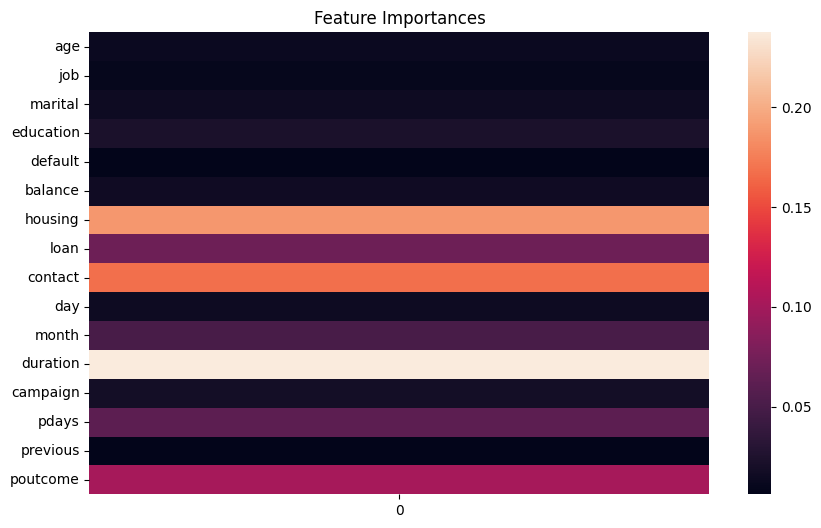

In [127]:


auc = roc_auc_score(y_test, y_pred[:, 1])
print(f"AUC: {auc:.4f}")
plt.figure(figsize=(10, 6))
sn.heatmap(pd.DataFrame(xgbmodel.feature_importances_, index=X_train.columns))
plt.title("Feature Importances")


In [128]:

col = X_train.columns
for i,j in zip(xgbmodel.feature_importances_,col):
    print(i,"",j)

0.013042089  age
0.009617566  job
0.015057869  marital
0.022700032  education
0.0061973254  default
0.015975565  balance
0.18812305  housing
0.070820875  loan
0.16712472  contact
0.015157278  day
0.050333768  month
0.23749569  duration
0.018549157  campaign
0.06179218  pdays
0.006159724  previous
0.10185319  poutcome


TypeError: 'Text' object is not callable

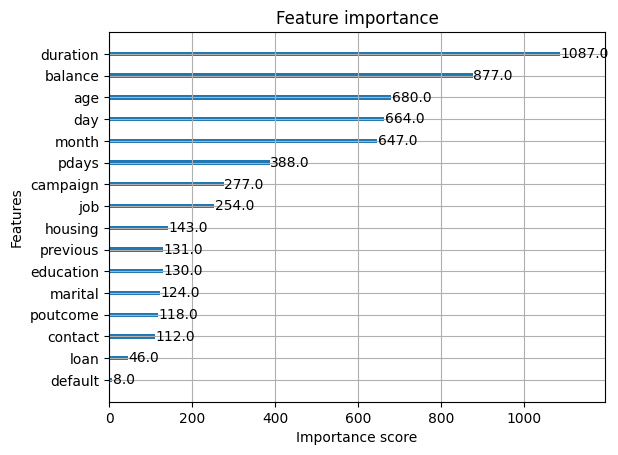

In [129]:

k = plot_importance(xgbmodel)
k.title("Feature Importance")
k.set_xlabel("Importance Score")
k.set_ylabel("Features")


# parameter

- learning_rate = 0.01 to 0.3
- max_depth = 3 to 10
- 

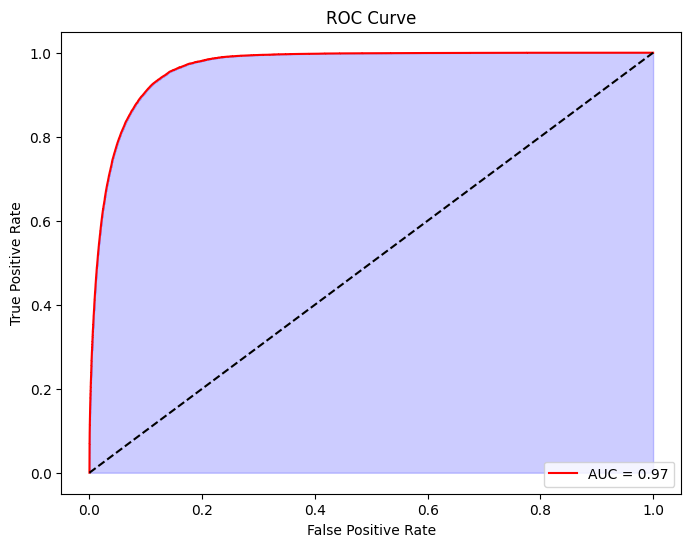

In [ ]:

fpr, tpr, thresholds = roc_curve(y_test, y_pred[:, 1])
auc_score = roc_auc_score(y_test, y_pred[:, 1])

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}", color='red')
plt.fill_between(fpr, tpr, color='blue', alpha=0.2) #ill under the curve
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()